# Compare the Risks of a Portfolio of Stocks
In this activity you will compare a basket of stocks and determine if they are risky investments compared to the SP500.

## 1. Import Modules

In [2]:
# Import Modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


## 2. Set paths to `CSV` Files
  - Each csv file contains a stock's closing price and the date of the closing price.

  - Create a `Path` object for each `CSV` filepath.

In [1]:
# Set paths to csv files
hd_path = Path("../Resources/HD.csv")
intc_path = Path("../Resources/INTC.csv")
mu_path = Path("../Resources/MU.csv")
nvda_path = Path("../Resources/NVDA.csv")
sp500_path = Path("../Resources/sp500.csv")
tsla_path = Path("../Resources/TSLA.csv")


NameError: name 'Path' is not defined

## 3. For each `CSV` file read the data into a `pandas` `DataFrame`.

  - Set the index column to be the date.

  - Infer the date time format.

  - Parse all dates when the `CSV` is loaded.

In [2]:
# Read in csv files
hd_df = pd.read_csv((hd_path), index_col = "date", parse_dates = True, infer_datetime_format = True)
intc_df = pd.read_csv((intc_path), index_col = "date", parse_dates = True, infer_datetime_format = True)
mu_df = pd.read_csv((mu_path), index_col = "date", parse_dates = True, infer_datetime_format = True)
nvda_df = pd.read_csv((nvda_path), index_col = "date", parse_dates = True, infer_datetime_format = True)
sp500_df = pd.read_csv((sp500_path), index_col = "date", parse_dates = True, infer_datetime_format = True)
tsla_df = pd.read_csv((tsla_path), index_col = "date", parse_dates = True, infer_datetime_format = True)

NameError: name 'pd' is not defined

## 4. Concatenate the Dataframes into one `DataFrame`
  - Use an inner join.

  - Set the axis to be the columns.

In [5]:
# Concatenate the dataframes into one dataframe
stocks_df = pd.concat([hd_df, intc_df, mu_df, nvda_df, sp500_df, tsla_df], axis="columns", join="inner")
stocks_df

,hd_close,intc_close,mu_close,nvda_close,sp500_close,tsla_close
date,,,,,,
2014-05-20,77.96,26.04,26.55,18.24,1872.83,195.30
2014-05-21,78.08,26.20,26.99,18.24,1888.03,199.45
2014-05-22,78.78,26.15,27.17,18.32,1892.49,204.88
2014-05-23,79.18,26.29,27.33,18.49,1900.53,207.30
2014-05-27,79.69,26.71,28.06,18.82,1911.91,211.56
...,...,...,...,...,...,...
2019-05-08,195.17,49.24,39.75,173.92,2879.42,244.84
2019-05-09,194.58,46.62,39.27,170.19,2870.72,241.98
2019-05-10,194.58,46.20,38.94,168.82,2881.40,239.52


## 5. Calculate the Daily Percent Changes
  - Drop all n/a values

In [6]:
# Calculate the daily percent changes and drop n/a values
stocks_daily_returns = stocks_df.pct_change().dropna()
stocks_daily_returns.head()

,hd_close,intc_close,mu_close,nvda_close,sp500_close,tsla_close
date,,,,,,
2014-05-21,0.001539,0.006144,0.016573,0.000000,0.008116,0.021249
2014-05-22,0.008965,-0.001908,0.006669,0.004386,0.002362,0.027225
2014-05-23,0.005077,0.005354,0.005889,0.009279,0.004248,0.011812
2014-05-27,0.006441,0.015976,0.026711,0.017847,0.005988,0.020550
2014-05-28,-0.000125,0.006365,0.019601,0.008502,-0.001114,-0.006239


## 6. Calculate Sharpe Ratios
  - There are 252 trading days in a year

  - Calculate the average annual return

  - Calculate the annualized standard deviation


In [7]:
# There are 252 trading days in a year
trading_days = 252

### Calculate the annual average return

In [8]:
# Calculate the annual average return
stocks_annual_average_return = stocks_daily_returns.mean()*(trading_days)
stocks_annual_average_return

hd_close       0.198321
intc_close     0.144027
mu_close       0.177969
nvda_close     0.524966
sp500_close    0.092164
tsla_close     0.130022
dtype: float64

### Calculate the annualized standard deviation

In [9]:
# Calculate the annualized standard deviation
stocks_annualized_std_dv = stocks_daily_returns.std()*np.sqrt(trading_days)
stocks_annualized_std_dv.sort_values()

sp500_close    0.133162
hd_close       0.187293
intc_close     0.258208
nvda_close     0.416985
tsla_close     0.436912
mu_close       0.453929
dtype: float64

### Calculate the Sharpe Ratios
  - The sharp ratio is ratio between the average annual return and the annualized standard deviation.
  - $\frac{R_{p}}{\sigma_{p}}$

In [10]:
# Calculate the sharpe ratios
sharpe_ratios = stocks_annual_average_return/stocks_annualized_std_dv
sharpe_ratios_sorted = sharpe_ratios.sort_values()

## 7. Plot the Sharpe Ratios with a bar plot

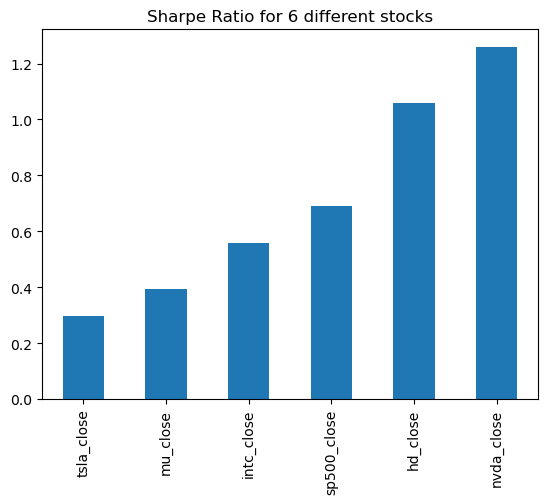

In [16]:
# Plot the sharpe ratios
ax = sharpe_ratios_sorted.plot.bar(title="Sharpe Ratio for 6 different stocks")
ax.set_label("Stock Tickers")
plt.show()